# TP 1 - Naive Bayes

El siguiente trabajo práctico consta de dos ejercicios relacionados con el primer modulo visto en clase.

Fecha de entrega: Domingo 4 de abril 23:59 hs

Fecha de defensa: Lunes 5 de abril en horario de clase

# **Para ambos ejercicios desarrollar el código propio del clasificador**

Se pueden utilizar librerias para la etapa de limpieza de los datos. Para el clasificador propiamente dicho, tiene que ser implementado completamente. Pueden basarse en notebooks vistas en clase u otros materiales, pero es requisito que entiendan cómo funciona el código que utilicen.

Por último, se recomienda validar el funcionamiento de los mismos utilizando algún clasificador de una librería como Sklear

##Ejercicio 1

Realizar un clasificador de noticias utilizando el conjunto de datos de fetch_20newsgroups de Sklearn. A continuación, encontrarán el código para poder obtener el dataset.


Recordar elegir una métrica para medir el desempeño del modelo y validar los resultados. 

Explicar paso a paso que es lo que se va desarrollando.

**Incluir una explicación sobre Laplacian smoothing y para qué se utiliza** (evaluar su aplicación en la resolución de la consigna)

In [ ]:
#Cargando dataset - training data
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
#diabetes.csv

##Ejercicio 2

A partir del Pima Indians Diabetes Dataset predecir la aparición de diabetes basado en diferentes valores diagnósticos.

Este conjunto de datos es del  National Institute of Diabetes and Digestive and Kidney Diseases originalmente. 

Posee ciertas limitaciones para la selección de los pacientes a partir de una base de datos más grande. En particular, son todos pacientes femeninos de al menos 21 años de edad de herencia Pima Indian.

Las variables:


*   Pregnancies (embarazos): Número de embarazos
*   Glucose: Concentración de glucosa en sangre a 2 horas de una prueba de tolerancia de glucosa oral.
*   BloodPresure (Presión sanguinea): Presión diastólica (mm Hg)
*   SkinThickness: Tamaño del pliege de la piel del triceps
*   Insulin: Insulina en sangre a 2 horas (mu U/ml)
*   BMI: Indice de masa corporal (peso en kg / (altura en metros)^2)
*   DiabetesPedigreeFunction: Una función que estima el likelihood de tener diabetes dado el historial familiar
*   Age: Edad (años)
*   Outcome: Variable 0 o 1 (0 no posee diabtes, 1 posee diabetes)

Este ejercicio consta de dos partes:



1.   Realizar un EDA completo de este dataset incluyendo: cantidad de valores nulos de las variables, número de personas para cada clase, análisis de distribuciones de las variables (por ejemplo se pueden usar histogramas), análisis de outliers y correlación entre variables. Recordar explicar las diferentes decisiones que se vayan tomando respecto de la limpieza y calidad de los datos
2.   Generar un clasificador utilizando las variables que se consideren óptimas. Recordar elegir una métrica para medir el desempeño del modelo y validar los resultados. 




In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.loc[df['Glucose'] == 0, 'Glucose' ] = np.NaN
df.loc[df['BloodPressure'] == 0, 'BloodPressure' ] = np.NaN
df.loc[df['SkinThickness'] == 0, 'SkinThickness' ] = np.NaN
df.loc[df['Insulin'] == 0, 'Insulin' ] = np.NaN
df.loc[df['BMI'] == 0, 'BMI' ] = np.NaN

In [38]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [40]:
df_diabetics=df[df['Outcome']==1]
df_diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,266.000000,252.000000,180.000000,130.000000,266.000000,268.000000,268.000000,268.0
mean,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164,1.0
std,3.741239,29.599199,12.299866,10.327595,132.699898,6.614982,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,27.000000,127.500000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.500000,32.000000,169.500000,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,84.000000,39.000000,239.250000,38.925000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [44]:
df_high_glucose=df[df['Glucose']>=130]
df_high_glucose['Outcome'].value_counts(normalize=True)
#df_high_glucose.describe()

1    0.627907
0    0.372093
Name: Outcome, dtype: float64

In [53]:
df_healthy=df[df['Outcome']==0]
df_healthy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,497.000000,481.000000,361.000000,264.000000,491.000000,500.000000,500.000000,500.0
mean,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000,0.0
std,3.017185,24.776906,12.161223,10.026491,102.482237,6.560737,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,19.000000,66.000000,25.600000,0.229750,23.000000,0.0
50%,2.000000,107.000000,70.000000,27.000000,102.500000,30.100000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,33.000000,161.250000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [54]:
df_low_glucose=df[df['Glucose']<130]
df_low_glucose['Outcome'].value_counts(normalize=True)
#df_high_glucose.describe()

0    0.794059
1    0.205941
Name: Outcome, dtype: float64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

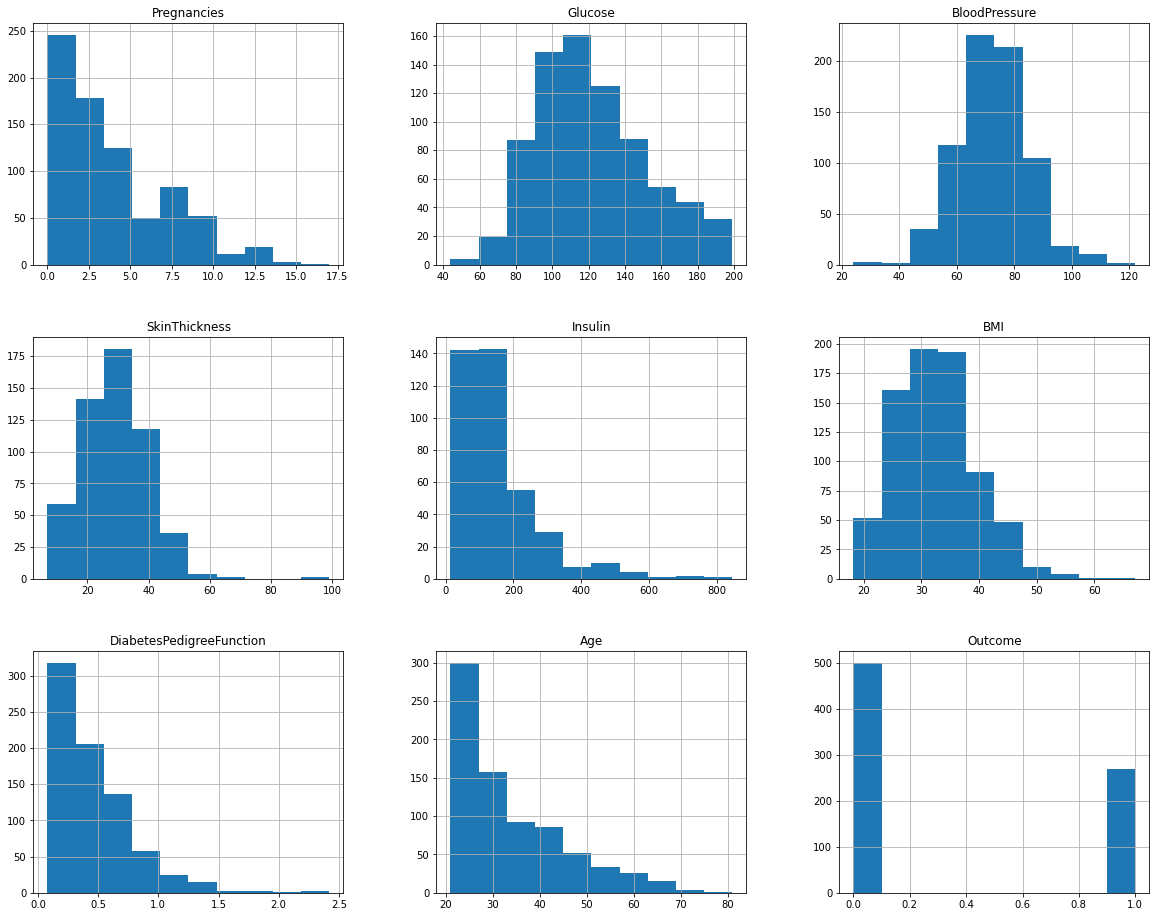

In [45]:
df.hist(figsize = (20,16), grid=True)

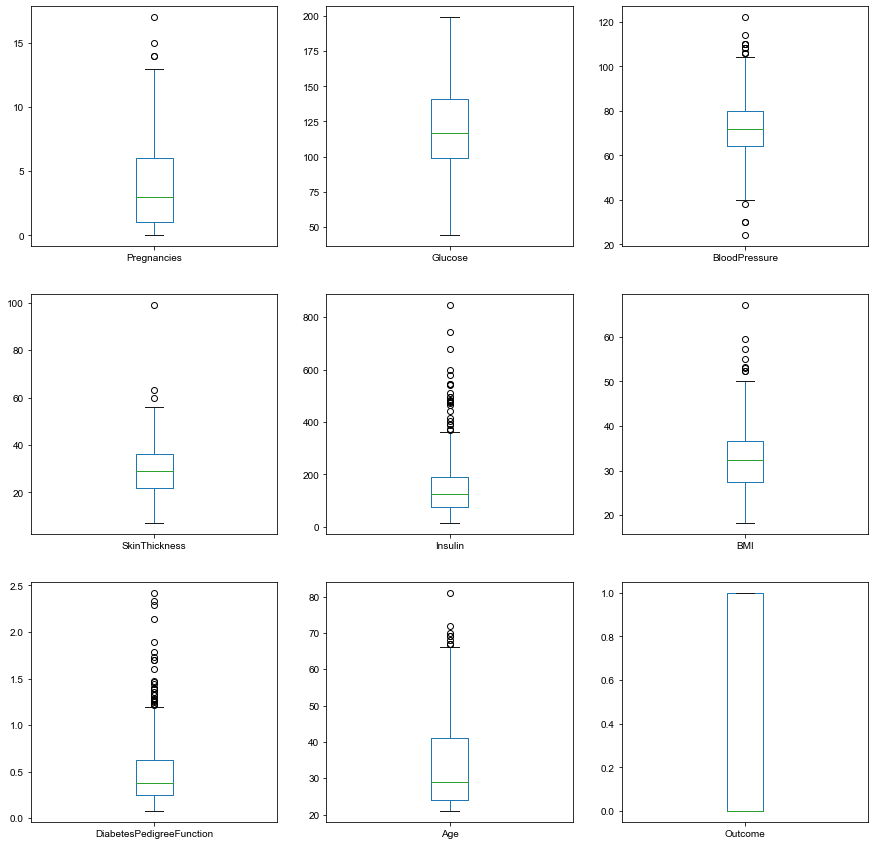

In [46]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

Bloodpressure diastolic > 110 = Acute Hypertension, not a bad reading
Bloodpressure low outlayers should be past ~60.. 20 is too low, must correct low pressure outlayers

SkinThickness ~100 is an excessive outlayer, data is useful however, bring back to set with top of box

a

Pregnancies: The outlayers are all diabetics with high glucose, could be useful if the pregnancies are normalized.

BMI: the high outlayers have useful data, could either keep them or reign them in.

Age: No need to correct outlayers for age.



NOTE: Pregnancies "could be useful if pregnancies are normalized" means correct the outlayers and keep the data

Insulin: according to medscape, the normal value peak at 2hs is at 166, values 3 std above that should be brought back down. All values above 500 should be removed or brought back down. Consider bringing all outlayers back down in this case.

DPF: do nothing

<AxesSubplot:>

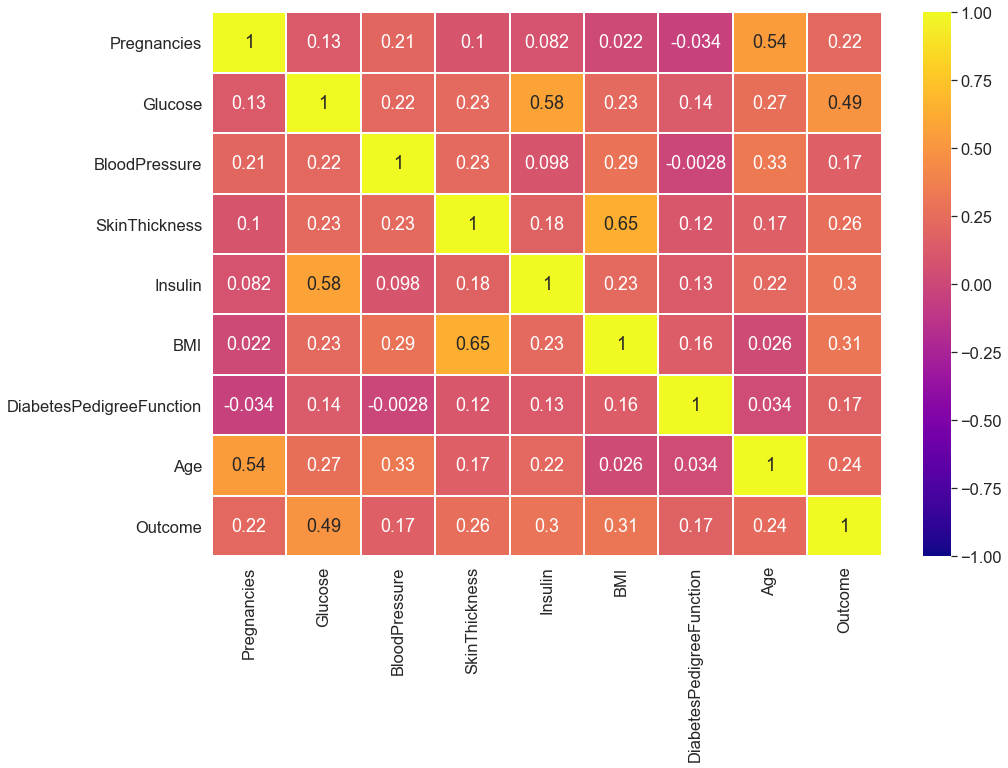

In [51]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

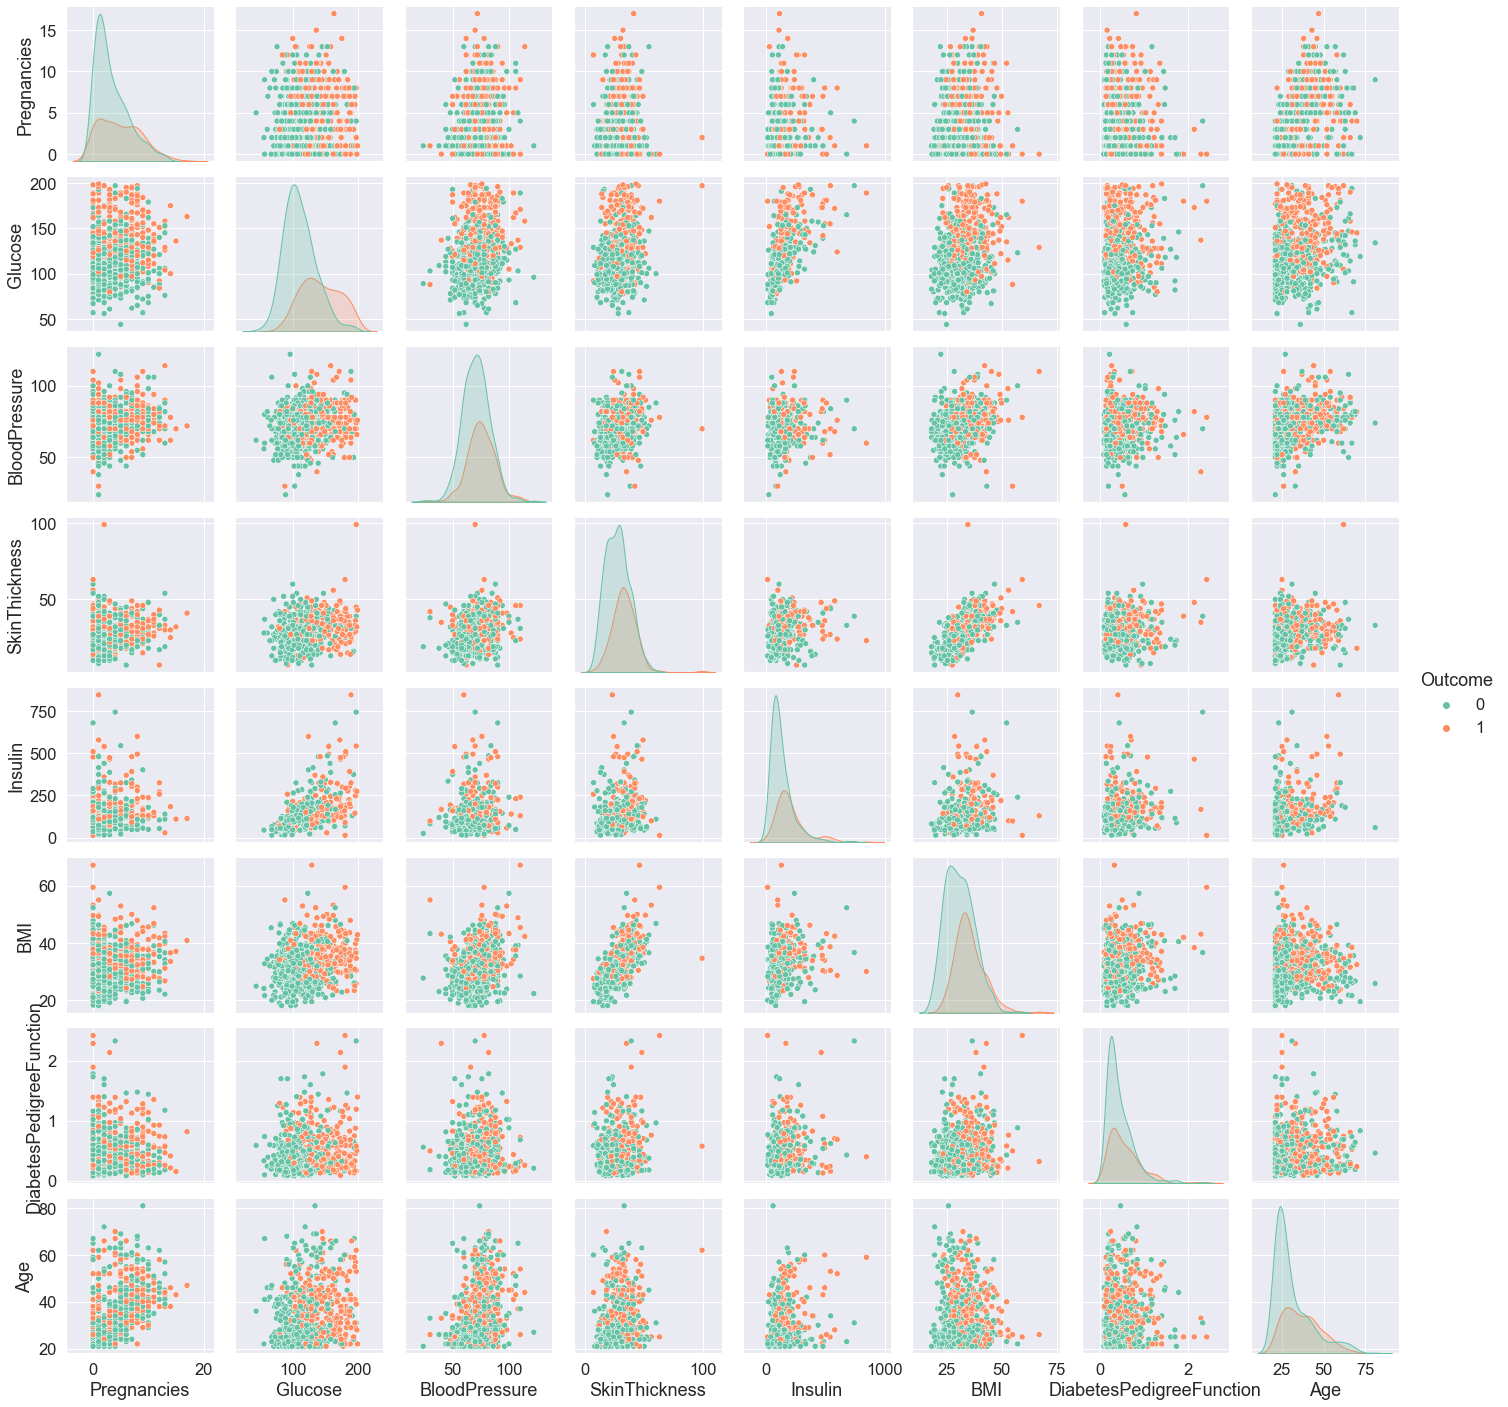

In [55]:


sns.set(font_scale = 1.5)
sns.pairplot(data = df, hue = 'Outcome', diag_kind = 'kde', palette = 'Set2')

In [57]:
df_wtf_skin=df[df['SkinThickness']>80]
#df_low_glucose['Outcome'].value_counts(normalize=True)
df_wtf_skin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1.0,1.0,1.0,1.0,0.0,1.0,1.000,1.0,1.0
mean,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0
25%,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0
50%,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0
75%,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0
max,2.0,197.0,70.0,99.0,NaN,34.7,0.575,62.0,1.0


In [69]:
df_insulin_outlayers=df[df['Insulin']>400]
#df_low_glucose['Outcome'].value_counts(normalize=True)
df_insulin_outlayers.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.300000,162.000000,72.800000,34.450000,534.800000,36.220000,0.628150,33.850000,0.600000
std,3.079645,22.370093,11.227785,9.577798,110.771267,6.394208,0.599708,13.358518,0.502625
min,0.000000,124.000000,52.000000,14.000000,402.000000,23.700000,0.128000,21.000000,0.000000
25%,1.000000,150.250000,63.500000,26.750000,477.000000,30.475000,0.253500,23.000000,0.000000
50%,2.000000,161.000000,70.000000,34.000000,495.000000,36.200000,0.481500,29.000000,1.000000
75%,5.500000,178.000000,82.500000,42.500000,553.500000,39.700000,0.687000,43.750000,1.000000
max,9.000000,197.000000,90.000000,49.000000,846.000000,52.300000,2.329000,60.000000,1.000000


In [68]:
df_insulin_outlayers['Outcome'].value_counts(normalize=True)

1    0.6
0    0.4
Name: Outcome, dtype: float64

In [72]:
df_prego_outlayers=df[df['Pregnancies']>13]
#df_low_glucose['Outcome'].value_counts(normalize=True)
df_prego_outlayers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,15.000000,143.50000,70.500000,32.000000,102.000000,37.050000,0.398500,43.500000,1.0
std,1.414214,33.27161,6.608076,6.683313,76.017542,2.996109,0.300209,4.041452,0.0
min,14.000000,100.00000,62.000000,25.000000,0.000000,33.600000,0.153000,38.000000,1.0
25%,14.000000,127.00000,68.000000,28.750000,82.500000,35.850000,0.197250,41.750000,1.0
50%,14.500000,149.50000,71.000000,31.000000,112.000000,36.850000,0.312000,44.500000,1.0
75%,15.500000,166.00000,73.500000,34.250000,131.500000,38.050000,0.513250,46.250000,1.0
max,17.000000,175.00000,78.000000,41.000000,184.000000,40.900000,0.817000,47.000000,1.0


In [73]:
df_obese_outlayers=df[df['BMI']>50]
#df_low_glucose['Outcome'].value_counts(normalize=True)
df_obese_outlayers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,2.500000,137.125000,72.750000,34.375000,157.875000,56.187500,0.761000,26.875000,0.75000
std,3.891382,30.253394,38.216489,23.439512,225.990163,5.099142,0.705264,5.617257,0.46291
min,0.000000,88.000000,0.000000,0.000000,0.000000,52.300000,0.209000,22.000000,0.00000
25%,0.000000,121.000000,64.500000,24.750000,10.500000,52.750000,0.400000,24.500000,0.75000
50%,0.500000,132.000000,84.000000,38.500000,99.500000,54.100000,0.537000,25.500000,1.00000
75%,3.500000,162.750000,98.500000,48.500000,157.500000,57.825000,0.789250,26.500000,1.00000
max,11.000000,180.000000,110.000000,63.000000,680.000000,67.100000,2.420000,40.000000,1.00000
